## By : Shivani Agrawal

# The Sparks Foundation

## Data Analytics & Business Analytics Intern

## Task 1: Prediction using Supervised ML

### In this regression task, we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
#importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#reading data
data = pd.read_csv("http://bit.ly/w-data")

In [3]:
#reading top 10 values of the dataset
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
#reading bottom 10 values of the dataset
data.tail(10)

,Hours,Scores
15,8.9,95
16,2.5,30
17,1.9,24
18,6.1,67
19,7.4,69
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


#### Checking how many null values are there in dataset

In [42]:
df.isnull().sum()

Actual       0
Predicted    0
dtype: int64

#### Descriptive analysis of the dataset using describe function

In [45]:
df.describe()

,Actual,Predicted
count,5.000000,5.000000
mean,41.600000,42.651852
std,22.255336,24.407192
min,20.000000,16.884145
25%,27.000000,26.794801
50%,30.000000,33.732261
75%,62.000000,60.491033
max,69.000000,75.357018


#### information about the dataset

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
Actual       5 non-null int64
Predicted    5 non-null float64
dtypes: float64(1), int64(1)
memory usage: 160.0 bytes


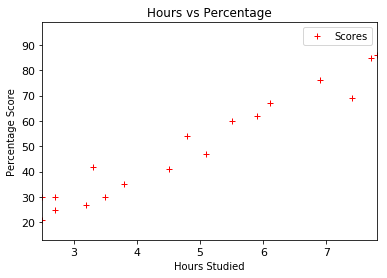

In [18]:
# Plotting the distribution of scores
data.plot( x='Hours' , y='Scores' , style='+' , color='r' , fontsize='11')
plt.title('Hours vs Percentage' )
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

#### From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

## Preparing the data

In [21]:
x = data.iloc[:,:-1].values #features should be in 2D array
y = data.iloc[:,1].values   #label should be in 1D array

In [26]:
x

array([[ 2.5],
       [ 5.1],
       [ 3.2],
       [ 8.5],
       [ 3.5],
       [ 1.5],
       [ 9.2],
       [ 5.5],
       [ 8.3],
       [ 2.7],
       [ 7.7],
       [ 5.9],
       [ 4.5],
       [ 3.3],
       [ 1.1],
       [ 8.9],
       [ 2.5],
       [ 1.9],
       [ 6.1],
       [ 7.4],
       [ 2.7],
       [ 4.8],
       [ 3.8],
       [ 6.9],
       [ 7.8]])

In [25]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

### Now, we will divide the given data into parts, i.e., training and testing using sklearn's  built-in train_test_split() method:

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state= 0)

### Now, we will create our linear regression model using training dataset and then check it's accuracy using testing dataset

In [28]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
#cofficient-a  , y=ax+b
model.coef_

array([ 9.91065648])

In [34]:
#intercept-b  , y=ax+b
model.intercept_

2.0181600414346832

### Formula of simple linear regression

In [50]:
line1=model.coef_*x_train+model.intercept_

### Plotting a scatter plot for training dataset

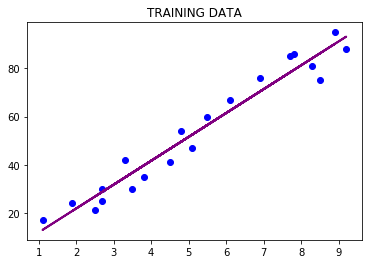

In [63]:
plt.scatter(x_train,y_train,color='blue')
plt.plot(x_train,line1,color='purple',linewidth=2)
plt.title('TRAINING DATA')
plt.show()

In [53]:
line2=model.coef_*x_test+model.intercept_

### Plotting a scatter plot for testing dataset

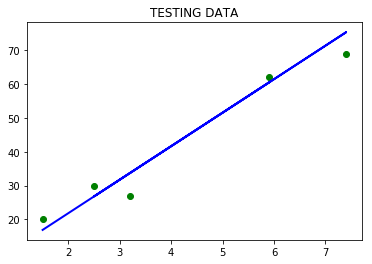

In [58]:
plt.scatter(x_test,y_test,color='green')
plt.plot(x_test,line2,color='blue',linewidth=2)
plt.title('TESTING DATA')
plt.show()

### Let's predict the test set results

In [37]:
y_pred = model.predict(x_test)

### Comparing Actual test results with Predicted test results

In [38]:
df = pd.DataFrame({'Actual' : y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Predicting the score if the student studies for 9.25 hrs/day

In [39]:
model.predict([[9.25]])

array([ 93.69173249])

## **Evaluating the model**

 The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [40]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899
